# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

## LGMVIP March - 23

### AUTHOR - Mutyala Harini

#### More Advanced Level Task

##### TASK-10- : ML Facial recognition to detect mood and suggest songs accordingly

###### Dataset link : https://www.kaggle.com/msambare/fer2013

In [1]:
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Importing Libraries

In [2]:
#Import Libraries/Packages
import numpy as np
import cv2
import os
import random
from skimage.io import imread
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
print("TensorFlow version :", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version : 2.11.0
Num GPUs Available:  0


### Data Visualization

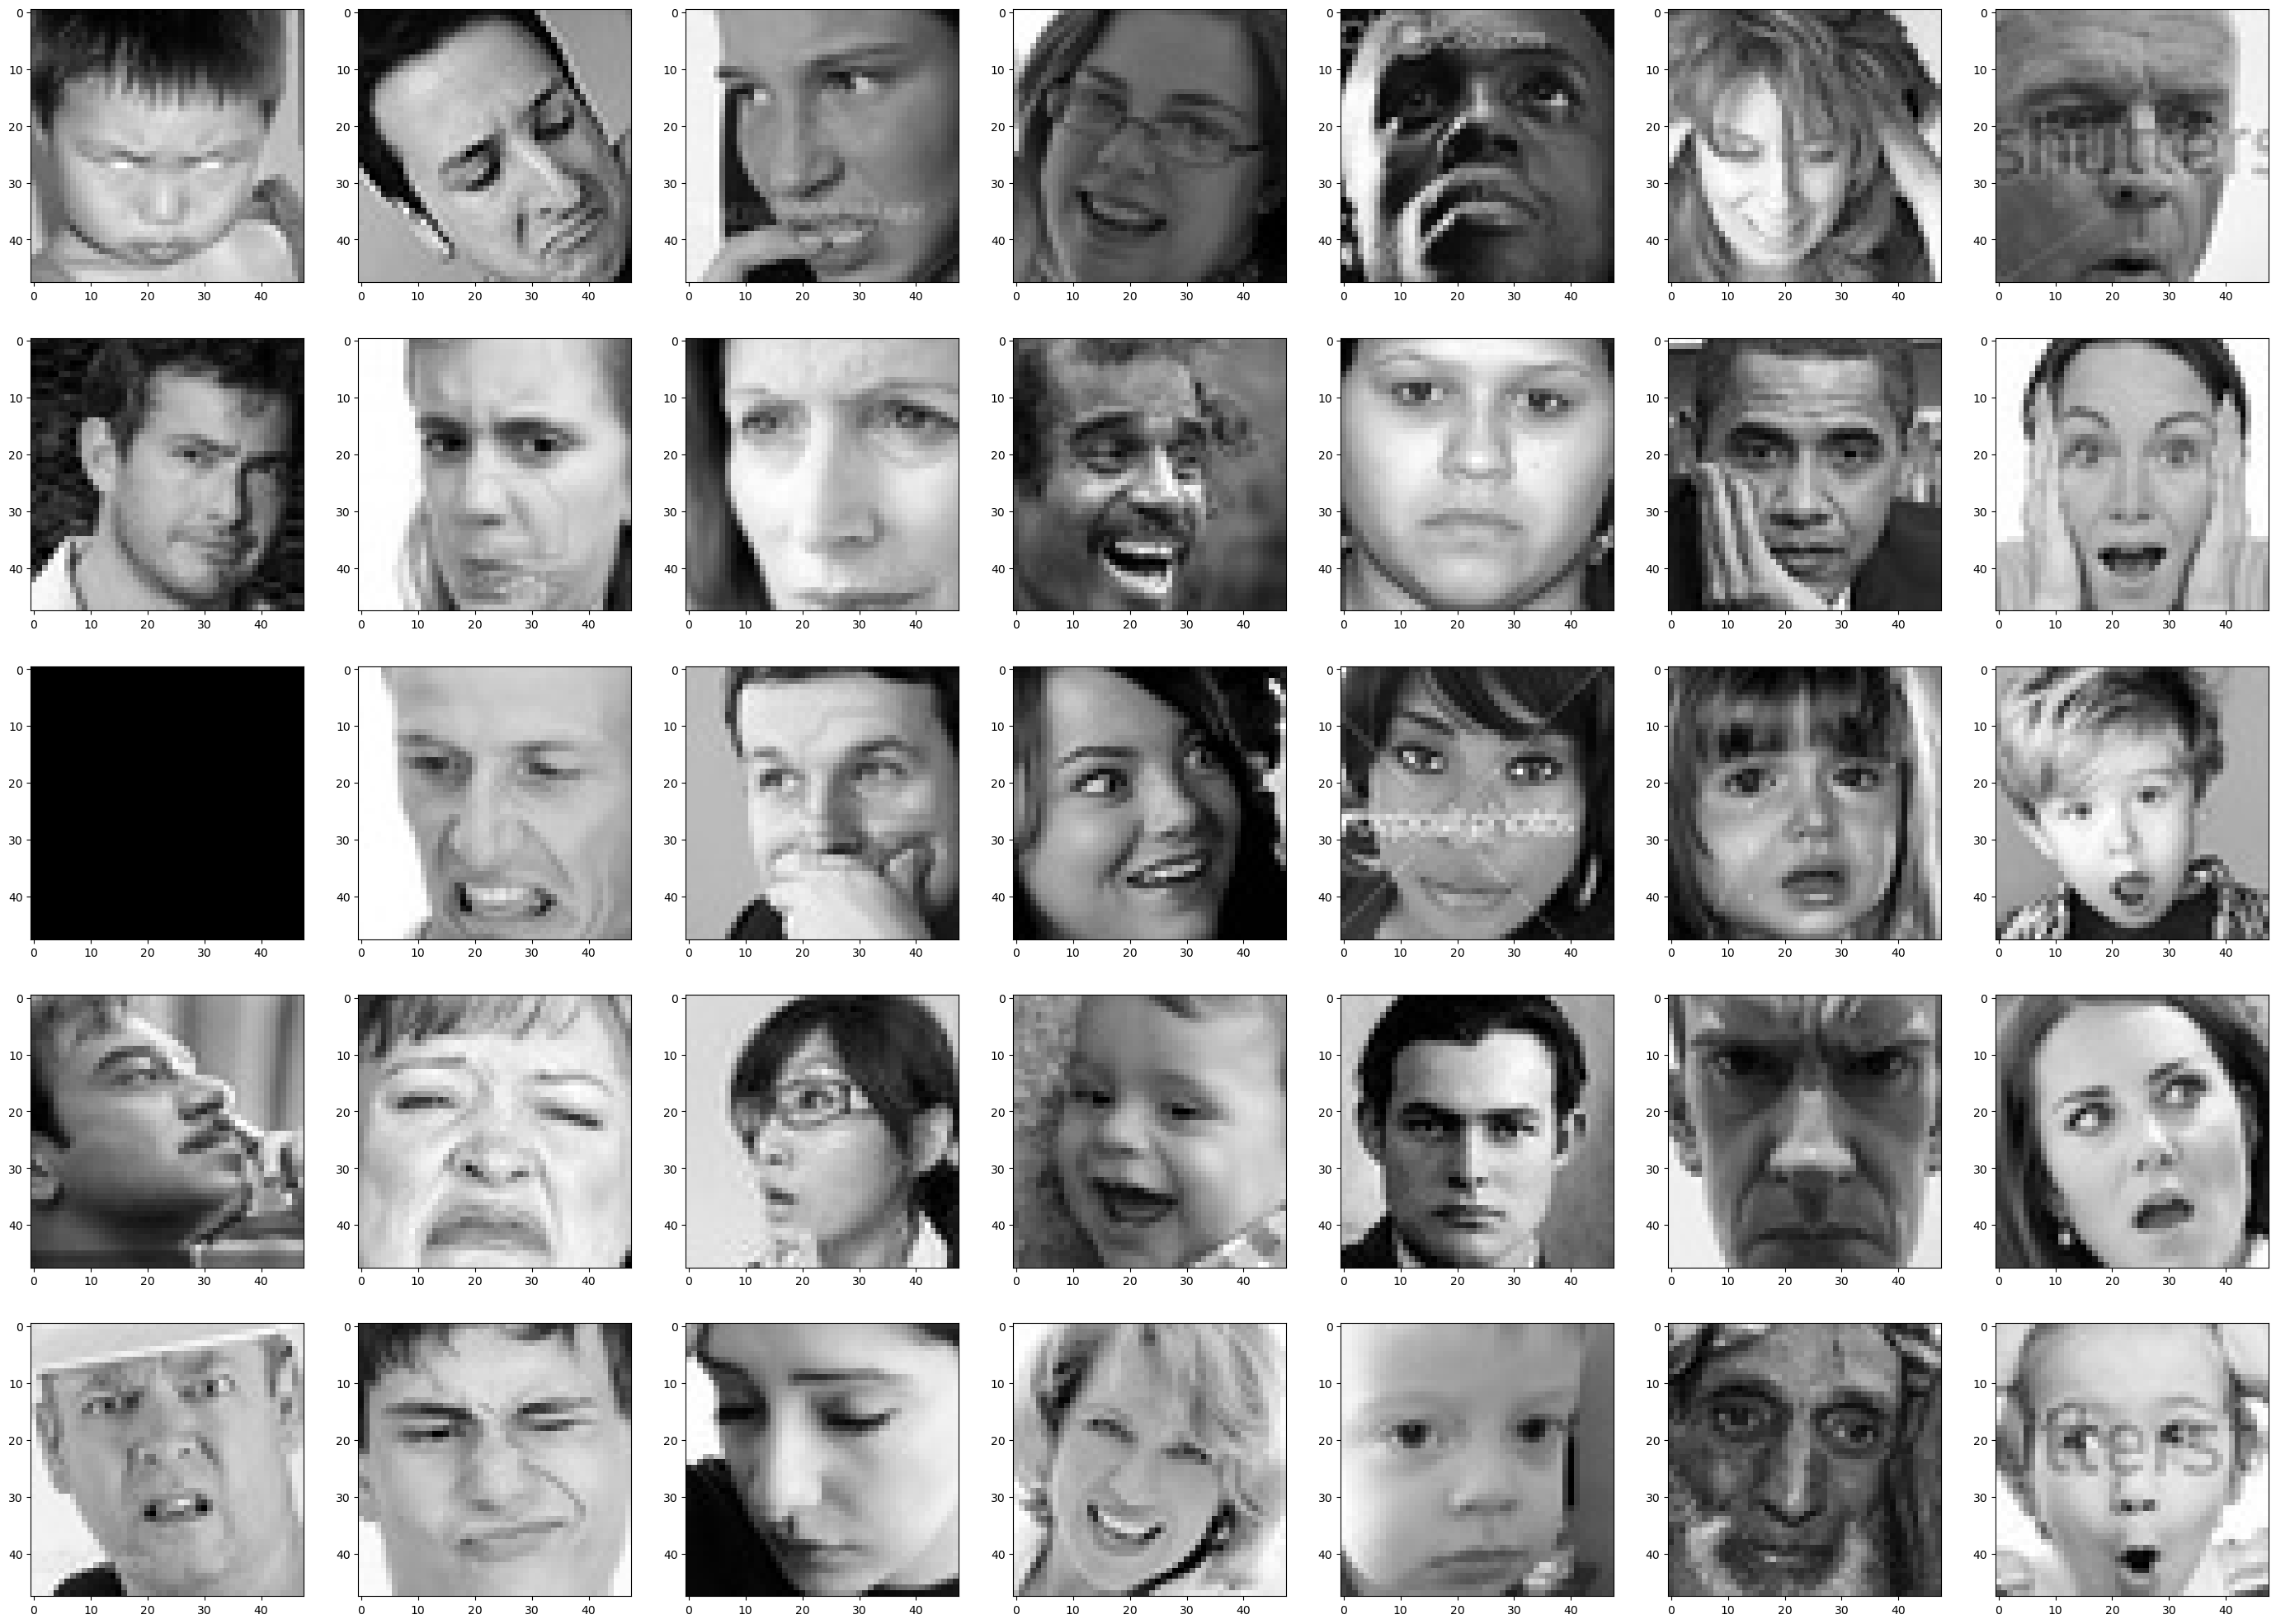

In [7]:
# Data Visualization
from skimage.io import imread
train_dir = "C:/Users/MUTYALA. SOWMYA/Downloads/Datasets/train/"
test_dir = "C:/Users/MUTYALA. SOWMYA/Downloads/Datasets/test/"
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y,v in zip(range(total_labels),os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir+v+'/'+os.listdir(train_dir+v)[x]), cmap='gray')

plt.show()

### Data Preprocessing

In [9]:
happy = os.listdir(train_dir+'happy/')
dim1, dim2 = [], []

for img_filename in happy:
    img = imread(train_dir+'happy/'+img_filename)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

train_gen = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1/255)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_gen.flow_from_directory(directory=test_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Creating the Model

In [24]:
# Create the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_9 (Batc  (None, 24, 24, 128)     

### Training the model

In [26]:
# Train the model
# Train the model
model.compile(
   loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy']
)

In [27]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 20

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    #callbacks=callbacks,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - 631s 1s/step - loss: 1.9174 - accuracy: 0.2329 - val_loss: 1.8159 - val_accuracy: 0.2473
Epoch 2/20
448/448 [==============================] - 459s 1s/step - loss: 1.8097 - accuracy: 0.2523 - val_loss: 1.8148 - val_accuracy: 0.2472
Epoch 3/20
448/448 [==============================] - 428s 954ms/step - loss: 1.8088 - accuracy: 0.2502 - val_loss: 1.8134 - val_accuracy: 0.2475
Epoch 4/20
448/448 [==============================] - 413s 923ms/step - loss: 1.8116 - accuracy: 0.2511 - val_loss: 1.8131 - val_accuracy: 0.2473
Epoch 5/20
448/448 [==============================] - 421s 940ms/step - loss: 1.8113 - accuracy: 0.2512 - val_loss: 1.8129 - val_accuracy: 0.2473
Epoch 6/20
448/448 [==============================] - 448s 1s/step - loss: 1.8107 - accuracy: 0.2511 - val_loss: 1.8151 - val_accuracy: 0.2473
Epoch 7/20
448/448 [==============================] - 556s 1s/step - loss: 1.8105 - accuracy: 0.2513 - val_loss: 1.8148 - val_accurac

### Evaluating the model

In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 [==============================] - 18s 162ms/step - loss: 1.8141 - accuracy: 0.2471
validation accuracy : 24.714405834674835%
validation loss : 1.8141160011291504


### Testing our model with new image

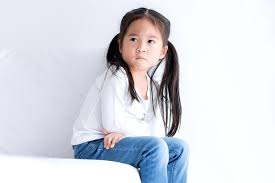

In [31]:
# Testing our model with new image
image = cv2.imread("C:/Users/MUTYALA. SOWMYA/Downloads/Sad.jpg")
from IPython.display import Image
Image(filename="C:/Users/MUTYALA. SOWMYA/Downloads/Sad.jpg")

### Model Prediction

In [33]:
# Model Prediction
import cv2
from tensorflow.python.keras.models import load_model
import os
# A list of emoticon categories
EMOTIONS = ['Angry', 'Disgust', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Load image
img = image

# Trim the image to 48 x 48, and turn the grayscale image, normalization
frame = cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0

# Reinvent the image dimension
gray = gray.reshape(1,48,48,1)

# Output the prediction
predicts = model.predict(gray)[0]
label = EMOTIONS[predicts.argmax()]
for (i,j) in zip(range(7),EMOTIONS):
    predictss = predicts[i]
    print("{:^10s}".format(j)+"prediction rate is   {0:.2f}%".format(predictss))
print( "\n\n The system considers this expression to be:",label)

1/1 [==============================] - 0s 200ms/step
  Angry   prediction rate is   0.14%
 Disgust  prediction rate is   0.02%
  Happy   prediction rate is   0.14%
   Sad    prediction rate is   0.26%
 Surprise prediction rate is   0.17%
 Neutral  prediction rate is   0.16%


 The system considers this expression to be: Sad


### Song Recommdation

In [34]:
if (label=='Angry'):
    path="C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Angry/"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Angry/'+ d,autoplay=True)
    display(audio)
    
elif (label=='Disgust'):
    path="C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Disgust/"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename="C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Disgust/"+ d,autoplay=True)
    display(audio)
    
elif (label=="Happy"):
    path="C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Happy/"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Happy/'+ d,autoplay=True)
    display(audio)
    
elif (label=='Sad'):
    path="C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Sad/"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Sad/'+ d,autoplay=True)
    display(audio)
    
elif (label=='Surprise'):
    path="C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Suprise/"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename="C:/Users/MUTYALA. SOWMYA/Downloads/Songs/Suprise/"+ d,autoplay=True)
    display(audio)

Now Playing: Sad_English Sad Song Slow Music heart touching painful.mp3
